In [1]:
import pandas as pd

In [2]:
column_names = ["id", "predicted_rating"]
output_df = pd.read_csv("./predictions/output.tsv", sep="\t", names=column_names)

In [3]:
output_df[output_df["predicted_rating"] > 5]["predicted_rating"]

16      5.119922
40      5.066168
47      5.027878
53      5.079932
57      5.052032
          ...   
5007    5.096002
5018    5.078171
5022    5.074006
5027    5.074980
5038    5.031521
Name: predicted_rating, Length: 487, dtype: float64

In [4]:
predicted_ratings = []

for predicted_rating in output_df["predicted_rating"]:
    if predicted_rating < 1.0:
        predicted_ratings.append(1.0)
    elif predicted_rating > 5.0:
        predicted_ratings.append(5.0)
    else:
        predicted_ratings.append(predicted_rating)

In [5]:
corrected_output_df = pd.DataFrame(
    {
        "id": list(output_df.index),
        "predicted_rating": predicted_ratings,
    }
)

display(corrected_output_df)

,id,predicted_rating
0,0,2.122241
1,1,4.740441
2,2,1.000000
3,3,1.213480
4,4,3.954807
...,...,...
5064,5064,1.748784
5065,5065,3.735532
5066,5066,2.353711
5067,5067,1.141975


In [14]:
predictions = corrected_output_df["predicted_rating"]

decimal_parts = []

for i, pred in enumerate(predictions):
    decimal_part = abs(pred - round(pred))
    decimal_parts.append(decimal_part)

In [15]:
decimal_parts_sorted = sorted(decimal_parts)

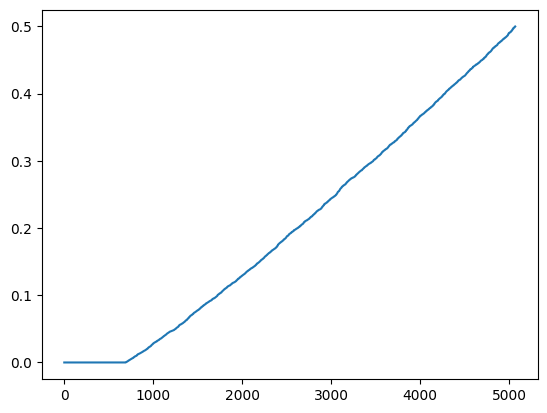

In [16]:
import matplotlib.pyplot as plt

plt.plot(decimal_parts_sorted)

In [ ]:
# df = corrected_output_df[["id", "predicted_rating"]]
# df.to_csv("./predictions/corrected_output.tsv", sep="\t", header=False, index=False)

In [26]:
corrected_output_df[corrected_output_df["predicted_rating"] > 5]["predicted_rating"]

Series([], Name: predicted_rating, dtype: float64)